# Prepare Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [2]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
titanic.dropna(inplace=True)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


In [5]:
titanic.drop(['deck', 'embark_town', 'alive','who','embarked','sex','class'],inplace = True, axis = 1)
titanic

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
1,1,1,38.0,1,0,71.2833,False,False
3,1,1,35.0,1,0,53.1000,False,False
6,0,1,54.0,0,0,51.8625,True,True
10,1,3,4.0,1,1,16.7000,False,False
11,1,1,58.0,0,0,26.5500,False,True
...,...,...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542,False,False
872,0,1,33.0,0,0,5.0000,True,True
879,1,1,56.0,0,1,83.1583,False,False
887,1,1,19.0,0,0,30.0000,False,True


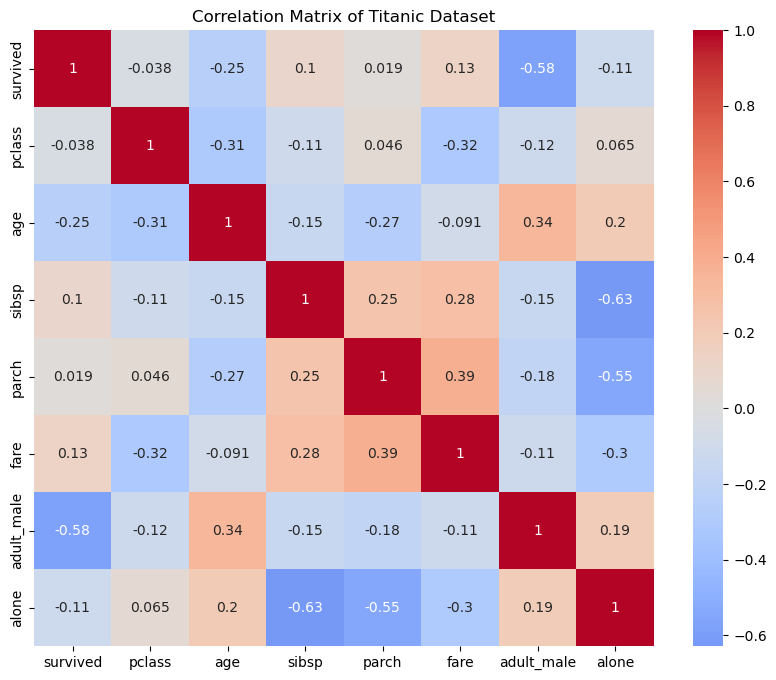

In [29]:
# Calculate the correlation matrix
corr_matrix = titanic.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()

<h1 style="color: #FF0000;"> Hence forth y = titanic['survived'] is a global variable 

In [6]:
y = titanic['survived']

# Linear Regression

## Define Normalize

In [7]:
def normalize(X):
    """
    Normalize the columns of a DataFrame.

    This function normalizes the columns of the input DataFrame `X` by subtracting the mean and dividing by the standard deviation for each column, except for columns with boolean data type.

    Parameters:
    X (pd.DataFrame): The input DataFrame to be normalized.

    Returns:
    pd.DataFrame: The normalized DataFrame.
    """
    for i in (X).columns:
        if X[i].dtype != 'bool':
            X[i] = (X[i] - X[i].mean())/X[i].std()
            continue
    return X
# normalize(titanic)

## Define Gradient Descend

In [8]:
def gradient_descend(X, y, learning_rate = 0.01, n_iter = 1000):
    def gradient_descend(X, y, learning_rate=0.01, n_iter=1000):
        """
        Perform gradient descent optimization to find the optimal parameters.
        Parameters:
        X (numpy.ndarray): The input features, where each row represents a sample and each column represents a feature.
        y (numpy.ndarray): The target values corresponding to each sample.
        learning_rate (float, optional): The learning rate for gradient descent. Default is 0.01.
        n_iter (int, optional): The number of iterations to run the gradient descent. Default is 1000.
        Returns:
        numpy.ndarray: The optimized parameters (theta) after performing gradient descent.
        """
    X = normalize(X)
    X = np.c_[np.ones(X.shape[0]), X]
    theta = np.zeros(X.shape[1])
    m = X.shape[0]
    
    for i in range(n_iter):
        h = X @ theta
        loss = (h - y)
        gradient = X.T @ loss / m
        theta = theta - (learning_rate * gradient)
    return theta

### Testing if the regression works

In [9]:
# x = (titanic.drop('survived', axis = 1))
# y = (titanic['survived'])
# theta = gradient_descend(X=x, y=y, learning_rate = 0.01, n_iter = 1000)
# theta



# Define Fitness Function
    Here we are using Akaike information criterion which is given by the formula
    
$AIC = 2k - 2ln(\hat{L})$

where $k$ = number of estimated parameters 
      $\hat{L}$ = maximised value of likelihood function
 

In [10]:
def rss(X,y,theta):
    def rss(X, y, theta):
        """
        Calculate the Residual Sum of Squares (RSS) for a given dataset and parameters.

        Parameters:
        X (numpy.ndarray): The input features matrix.
        y (numpy.ndarray): The target values vector.
        theta (numpy.ndarray): The parameters vector.

        Returns:
        float: The residual sum of squares.
        """
        # function implementation

    def calculate_aic(X, y, theta):
        """
        Calculate the Akaike Information Criterion (AIC) for a given dataset and parameters.

        Parameters:
        X (numpy.ndarray): The input features matrix.
        y (numpy.ndarray): The target values vector.
        theta (numpy.ndarray): The parameters vector.

        Returns:
        float: The Akaike Information Criterion.
        """
        # function implementation
    X = normalize(X)
    X = np.c_[np.ones(X.shape[0]), X]
    residual_sum_squares = sum(((X @ theta) - y)**2)
    return residual_sum_squares

def calculate_aic(X,y,theta):
    n = len(y)
    aic = 2 * X.shape[1] + n * np.log(rss(X,y,theta) / n)
    return aic    

In [11]:
# x = (titanic.drop('survived', axis = 1))
# y = (titanic['survived'])
# theta = gradient_descend(X=x, y=y, learning_rate = 0.01, n_iter = 1000)
# calculate_aic(x,y,theta)

# Generate Parent Population

In [12]:
def parent_pops(data,size,y):
    def parent_pops(data, size, y):
        """
        Generates a list of parent populations by randomly selecting features from the given data.

        Args:
            data (pd.DataFrame): The input dataframe containing the data.
            size (int): The number of parent populations to generate.
            y (str): The name of the column to be excluded from the feature selection.

        Returns:
            list: A list of dataframes, each representing a parent population with randomly selected features.
        """
    papa_pops = []
    df_temp = data.drop(y, axis = 1)
    for i in range(size):
        feature_arrs = np.random.choice([True,False],size = df_temp.shape[1])
        papa_pops.append(df_temp.iloc[:, np.where(feature_arrs)[0]])
    return papa_pops

In [13]:
parent_pops(titanic,10,'survived')

[     pclass  sibsp
 1         1      1
 3         1      1
 6         1      0
 10        3      1
 11        1      0
 ..      ...    ...
 871       1      1
 872       1      0
 879       1      0
 887       1      0
 889       1      0
 
 [182 rows x 2 columns],
      pclass   age  parch  adult_male  alone
 1         1  38.0      0       False  False
 3         1  35.0      0       False  False
 6         1  54.0      0        True   True
 10        3   4.0      1       False  False
 11        1  58.0      0       False   True
 ..      ...   ...    ...         ...    ...
 871       1  47.0      1       False  False
 872       1  33.0      0        True   True
 879       1  56.0      1       False  False
 887       1  19.0      0       False   True
 889       1  26.0      0        True   True
 
 [182 rows x 5 columns],
      pclass  parch  adult_male
 1         1      0       False
 3         1      0       False
 6         1      0        True
 10        3      1       False
 11   

## Calculate fitness score for parents

In [14]:
def parent_score(keys):
    """
    Calculate the AIC score for each key in the given list of keys.

    This function performs gradient descent for each key to find the optimal
    parameters and then calculates the AIC score for the resulting model.
    The AIC score is stored in a dictionary with an incremental integer as the key.

    Args:
        keys (list): A list of keys for which the AIC score needs to be calculated.

    Returns:
        dict: A dictionary where the keys are incremental integers starting from 0,
              and the values are the negative AIC scores for the corresponding keys.
    """
    pop_score = {}
    temp_var = 0
    for key in keys:
        theta1 = gradient_descend(key, y, learning_rate = 0.01, n_iter = 1000)
        aic = -1*calculate_aic(key,y,theta1)
        pop_score[temp_var] = aic
        temp_var += 1
    return pop_score

In [15]:
parent_score(parent_pops(titanic,10,'survived'))

{0: 274.3545539289771,
 1: 272.6645454513781,
 2: 340.03346507480313,
 3: 272.3499083818845,
 4: 285.61709691456315,
 5: 284.41664835062136,
 6: 281.71350798262654,
 7: 271.6949844630987,
 8: 284.2883120339215,
 9: 284.15529645426574}

## Select fittest n parents

In [16]:
# population = parent_pops(titanic,100,'survived')
def fittest_parents(population,lamda):
    def fittest_parents(population, lamda):
        """
        Selects the fittest parents from a given population based on their scores.
        Args:
            population (list): A list representing the population of individuals.
            lamda (int): The number of top fittest parents to select.
        Returns:
            list: A list of the fittest parents from the population.
        The function first calculates the scores for each parent in the population
        using the `parent_score` function. It then sorts the parents based on their
        scores in descending order and selects the top `lamda` parents. Finally, it
        returns these top fittest parents.
        """
    parent_scores = parent_score(population)
    fittest_parent = []
    sorted_parents = sorted(parent_scores.items(), key = lambda x:x[1], reverse = True)
    top_lamda_parents_indices = sorted_parents[:lamda]
    top_lamda_parents = [item[0] for item in top_lamda_parents_indices]
    
    for i in top_lamda_parents:
        fittest_parent.append(population[i])
    return fittest_parent

In [17]:
fittest_parents(parent_pops(titanic,20,'survived'),10)

[       pclass     parch  adult_male
 1   -0.372392 -0.632414       False
 3   -0.372392 -0.632414       False
 6   -0.372392 -0.632414        True
 10   3.500488  0.690567       False
 11  -0.372392 -0.632414       False
 ..        ...       ...         ...
 871 -0.372392  0.690567       False
 872 -0.372392 -0.632414        True
 879 -0.372392  0.690567       False
 887 -0.372392 -0.632414       False
 889 -0.372392 -0.632414        True
 
 [182 rows x 3 columns],
         sibsp     parch  adult_male
 1    0.826296 -0.632414       False
 3    0.826296 -0.632414       False
 6   -0.724074 -0.632414        True
 10   0.826296  0.690567       False
 11  -0.724074 -0.632414       False
 ..        ...       ...         ...
 871  0.826296  0.690567       False
 872 -0.724074 -0.632414        True
 879 -0.724074  0.690567       False
 887 -0.724074 -0.632414       False
 889 -0.724074 -0.632414        True
 
 [182 rows x 3 columns],
        pclass     sibsp     parch      fare  adult_male
 

# Define crossover
    we choose uniform-crossover initially

In [18]:
def uniform_crossover(data,target_variable,parent1, parent2):
    def uniform_crossover(data, target_variable, parent1, parent2):
        """
        Perform uniform crossover on two parent DataFrames to generate two new parent DataFrames.
        Parameters:
        data (pd.DataFrame): The original dataset containing all features and the target variable.
        target_variable (str): The name of the target variable column in the dataset.
        parent1 (pd.DataFrame): The first parent DataFrame containing a subset of features.
        parent2 (pd.DataFrame): The second parent DataFrame containing a subset of features.
        Returns:
        tuple: A tuple containing two new parent DataFrames generated from the crossover.
        """
    X = data.drop(target_variable, axis = 1) 
    parent_list1 = parent1.columns.tolist()
    temp = 0
    
    bool_arr1 = np.zeros(X.shape[1])
    for i in parent_list1:
        bool_arr1[X.columns.get_loc(i)] = 1
        
    bool_arr2 = np.zeros(X.shape[1])
    parent_list2 = parent2.columns.tolist()
    for i in parent_list2:
        bool_arr2[X.columns.get_loc(i)] = 1
        
    for i in range(len(bool_arr1)):
        if np.random.uniform() >= 0.5:
            temp = bool_arr1[i]
            bool_arr1[i] = bool_arr2[i]
            bool_arr2[i] = temp
            continue
            
    new_parent1 = X.iloc[:, np.where(bool_arr1)[0]]
    new_parent2 = X.iloc[:, np.where(bool_arr2)[0]]
    return  new_parent1, new_parent2

In [19]:
#test it
population = parent_pops(titanic,2,'survived')
population

[      age
 1    38.0
 3    35.0
 6    54.0
 10    4.0
 11   58.0
 ..    ...
 871  47.0
 872  33.0
 879  56.0
 887  19.0
 889  26.0
 
 [182 rows x 1 columns],
      pclass   age     fare  alone
 1         1  38.0  71.2833  False
 3         1  35.0  53.1000  False
 6         1  54.0  51.8625   True
 10        3   4.0  16.7000  False
 11        1  58.0  26.5500   True
 ..      ...   ...      ...    ...
 871       1  47.0  52.5542  False
 872       1  33.0   5.0000   True
 879       1  56.0  83.1583  False
 887       1  19.0  30.0000   True
 889       1  26.0  30.0000   True
 
 [182 rows x 4 columns]]

In [20]:
parent_1 = population[0]
parent_2 = population[1]
uniform_crossover(titanic,'survived',parent_1, parent_2)

(     pclass   age  alone
 1         1  38.0  False
 3         1  35.0  False
 6         1  54.0   True
 10        3   4.0  False
 11        1  58.0   True
 ..      ...   ...    ...
 871       1  47.0  False
 872       1  33.0   True
 879       1  56.0  False
 887       1  19.0   True
 889       1  26.0   True
 
 [182 rows x 3 columns],
       age     fare
 1    38.0  71.2833
 3    35.0  53.1000
 6    54.0  51.8625
 10    4.0  16.7000
 11   58.0  26.5500
 ..    ...      ...
 871  47.0  52.5542
 872  33.0   5.0000
 879  56.0  83.1583
 887  19.0  30.0000
 889  26.0  30.0000
 
 [182 rows x 2 columns])

# Define Mutation
    we choose random bit-flip mutation initially

In [21]:
def rbf_mutation(data,target_variable,parent1, parent2,mutation_rate):
    def rbf_mutation(data, target_variable, parent1, parent2, mutation_rate):
        """
        Perform mutation on two parent feature sets using a Radial Basis Function (RBF) approach.
        Parameters:
        data (pd.DataFrame): The dataset containing all features and the target variable.
        target_variable (str): The name of the target variable column in the dataset.
        parent1 (pd.DataFrame): The first parent feature set.
        parent2 (pd.DataFrame): The second parent feature set.
        mutation_rate (float): The mutation rate, a value between 0 and 1, determining the likelihood of mutation.
        Returns:
        tuple: A tuple containing two new mutated parent feature sets (new_parent1, new_parent2).
        """
    X = data.drop(target_variable, axis = 1)
    
    bool_arr1 = np.zeros(X.shape[1])
    parent_list1 = parent1.columns.tolist()
    for i in parent_list1:
        bool_arr1[X.columns.get_loc(i)] = 1
        
    bool_arr2 = np.zeros(X.shape[1])
    parent_list2 = parent2.columns.tolist()
    for i in parent_list2:
        bool_arr2[X.columns.get_loc(i)] = 1
        
    for i in range(len(bool_arr1)):
        if mutation_rate > np.random.normal(loc = .5, scale = .25, size = 1):
            bool_arr1[i] = 1-bool_arr1[i]
            continue
    for i in range(len(bool_arr2)):
        if mutation_rate > np.random.normal(loc = .5, scale = .25, size = 1):
            bool_arr2[i] = 1-bool_arr2[i]
            continue
            
    new_parent1 = X.iloc[:, np.where(bool_arr1)[0]]
    new_parent2 = X.iloc[:, np.where(bool_arr2)[0]]    
    
    return new_parent1, new_parent2



In [22]:
rbf_mutation(titanic,'survived',parent_1, parent_2,1)

(     pclass  sibsp  parch     fare  adult_male  alone
 1         1      1      0  71.2833       False  False
 3         1      1      0  53.1000       False  False
 6         1      0      0  51.8625        True   True
 10        3      1      1  16.7000       False  False
 11        1      0      0  26.5500       False   True
 ..      ...    ...    ...      ...         ...    ...
 871       1      1      1  52.5542       False  False
 872       1      0      0   5.0000        True   True
 879       1      0      1  83.1583       False  False
 887       1      0      0  30.0000       False   True
 889       1      0      0  30.0000        True   True
 
 [182 rows x 6 columns],
      sibsp  parch  adult_male
 1        1      0       False
 3        1      0       False
 6        0      0        True
 10       1      1       False
 11       0      0       False
 ..     ...    ...         ...
 871      1      1       False
 872      0      0        True
 879      0      1       False
 88

# The $(\mu , \lambda)$ Genetic Algorithm



In [23]:
def gen_alg(data,target_variable,pop_size,no_parents_selected,iterations,mutation_rate): 
    def gen_alg(data, target_variable, pop_size, no_parents_selected, iterations, mutation_rate):
        """
        Executes a genetic algorithm to optimize a given target variable.
        Parameters:
        data (DataFrame): The dataset containing the features and target variable.
        target_variable (str): The name of the target variable to be optimized.
        pop_size (int): The size of the population.
        no_parents_selected (int): The number of parents selected for crossover.
        iterations (int): The number of iterations to run the algorithm.
        mutation_rate (float): The mutation rate for the algorithm.
        Returns:
        DataFrame: The fittest parent(s) from the final population.
        """
    population = parent_pops(data,pop_size,target_variable)
    
    for z in range(iterations):
        # print("iteration:",z)
        parents = fittest_parents(population,no_parents_selected)
        # print("parents:",parents)
        new_gen = []
        for i in range(len(parents)):
            for j in range(i+1, len(parents)):
                parent1 = parents[i]
                parent2 = parents[j]
                if np.random.normal(loc = .5 , scale = .25 , size = 1) < 0.5:
                    offspring1, offspring2 = uniform_crossover(data, target_variable, parent1, parent2)
                else:
                    offspring1, offspring2 = rbf_mutation(data, target_variable, parent1, parent2, mutation_rate)
                
                # print(f"Offspring Type=  {type(offspring1)}", i, j)
                # print(offspring1, offspring2)
                new_gen.append(offspring1)
                new_gen.append(offspring2)
                
        population = new_gen

    return fittest_parents(population,1)

# The $(\mu + \lambda)$ Genetic Algorithm (Elitism)


In [ ]:
def gen_alg2(data,target_variable,pop_size,no_parents_selected,iterations,mutation_rate):
    
    

In [25]:
m = gen_alg(titanic,'survived',20,5,10,.3)
m

[       pclass       age     parch  adult_male
 1   -0.372392  0.151664 -0.632414       False
 3   -0.372392 -0.039765 -0.632414       False
 6   -0.372392  1.172618 -0.632414        True
 10   3.500488 -2.017864  0.690567       False
 11  -0.372392  1.427856 -0.632414       False
 ..        ...       ...       ...         ...
 871 -0.372392  0.725950  0.690567       False
 872 -0.372392 -0.167385 -0.632414        True
 879 -0.372392  1.300237  0.690567       False
 887 -0.372392 -1.060719 -0.632414       False
 889 -0.372392 -0.614052 -0.632414        True
 
 [182 rows x 4 columns]]

In [26]:
X = m[0]

theta = gradient_descend(X, y, learning_rate=0.01, n_iter=1000)

aic_value = calculate_aic(X, y, theta)
aic_value

-346.7431989734589